In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log, sqrt, exp, pi, factorial, erf
from collections import OrderedDict
import random
import math

# 1. Random Data Generator 

# a. Univariate gaussian data generator

In [2]:
def Gaussian_df(x,u, v):
    return (exp(-1*(((x - u)**2) / (2*v) ) ) / sqrt(2*pi*v))

def gaussian_pdf_line(mu, sig):
    X = []
    Y = []
    for i in range(-1000, 1000):
        x = i / 1000 * 4 * sig
        #x=i
        y = Gaussian_df(x, mu, sig)
        X.append(x)
        Y.append(y)
        
    return X, Y

def central_limit(mean=0,var=1,n=30000):
    N = list()
    for i in range(n):
        z = np.random.uniform(0,1,12)
        nz = np.sum(z)-6
        N.append(mean+var*nz)
    
    return N

In [3]:
def univariate_Data_Generator():
    N=list()
    N=central_limit(0,1)
    plt.figure(figsize=(10,6))    
    #plt.style.use('fivethirtyeight')    
    X,Y=gaussian_pdf_line(0,1)
    #_=plt.hist(N, bins=30, normed=True)
    #_=plt.plot(X,Y)
    #_=plt.title('Normal data using Central Limit Theorem ')
    
    return N

In [4]:
random_data = univariate_Data_Generator()

# b. Polynomial basis linear model data generator  

In [5]:
#version.1
def polynomial_data_generator1(N,W,x,n,a,plot=True):
    
    e=central_limit(0,a,N)
    d = {}
    for i in range(n):                
        d['x' + str(i)] = x ** (i)        
    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values())
    y_real = W.dot(X.T)
    y = W.dot(X.T)+np.random.normal(0, a)
    if plot:
        plt.figure(figsize=(10,6))    
        plt.style.use('fivethirtyeight')
        _=plt.plot(x,y, alpha=0.2)
        #_=plt.scatter(x,y_real)
        _=plt.title('Polynomial basis linear model data generator')
    
    return y

In [6]:
 x = np.arange(-2, 2, 0.01)
w=np.array([1, 2,3,4])
N=x.shape[0]
polynomial_data_generator1(N,w,x,n=4,a=1,plot=False).shape

(400,)

# 2. Sequential Estimator


In [9]:
def sequential_estimator(mu=3.0,sigma=5.0,est_mean=0,est_var=0,N=1000):
    
    
    for i in range(1,N): 
        x=central_limit(3,5,1)
        print('Add data Point:',x[0])
    
        new_est_mean= est_mean +(x[0]-est_mean)/i
    
        if i>1:
            new_est_var= ((i-2)/(i-1))*est_var+(((x[0]-est_mean)**2)/i)
        else:
            new_est_var= est_var
        
        mean_dif = round(new_est_mean-est_mean,3)
        var_dif  = round(new_est_var-est_var,3)
   
        if i>1:
            if abs(mean_dif)<=0.005 and abs(var_dif)<=0.005:
                print('Add data Points:',x[0])
                print('Sequential Estimate Converged....')
                print('Mean=',new_est_mean,'Variance=',new_est_var)
                break
            else:
                est_mean=new_est_mean
                est_var= new_est_var
            
        print('Mean=',est_mean, '  ','Variance=',est_var)
    

In [10]:
sequential_estimator(mu=3.0,sigma=5.0,est_mean=0,est_var=0,N=1000)

Add data Point: -9.629725491953268
Mean= 0    Variance= 0
Add data Point: -3.2025324466866794
Mean= -1.6012662233433397    Variance= 5.128107036040484
Add data Point: 3.91873117700775
Mean= 0.23873291010702347    Variance= 12.720843951314503
Add data Point: 11.42649231417174
Mean= 3.0356727611232026    Variance= 39.7720527550193
Add data Point: -0.29451422723814336
Mean= 2.3696353634509335    Variance= 32.04706864175472
Add data Point: 6.751138444293369
Mean= 3.099885876924673    Variance= 28.837249787975736
Add data Point: 4.912720657039864
Mean= 3.358862274083986    Variance= 24.500522909979107
Add data Point: -5.476678147701913
Mean= 2.2544197213607484    Variance= 30.758795026680083
Add data Point: 5.410070866776204
Mean= 2.6050476264069102    Variance= 28.020404998518615
Add data Point: 5.871133614511465
Mean= 2.931656225217366    Variance= 25.97375843351917
Add data Point: -4.445677957734627
Mean= 2.2609894813126394    Variance= 28.324115285344703
Add data Point: -4.8290779964837

Mean= 3.0270372944199786    Variance= 23.649885486004436
Add data Point: -1.3521770675773475
Mean= 3.01661059355808    Variance= 23.639102603389055
Add data Point: 3.4697701819378297
Mean= 3.0176869821290535    Variance= 23.583306801563698
Add data Point: -0.32055286913890857
Mean= 3.009776461154485    Variance= 23.553696662102105
Add data Point: 1.3521068822847555
Mean= 3.0058576205425    Variance= 23.50437835790244
Add data Point: 6.614961400933088
Mean= 3.014369657760402    Variance= 23.479533277320936
Add data Point: 1.2716328450986643
Mean= 3.010269100554139    Variance= 23.431303211587185
Add data Point: -6.500216411198696
Mean= 2.987944017193217    Variance= 23.588493115295
Add data Point: -2.288888385817132
Mean= 2.9755860958746916    Variance= 23.598331745376026
Add data Point: 5.229851419522193
Mean= 2.9808530709299426    Variance= 23.55493949068
Add data Point: -7.271807086923328
Mean= 2.956954096203012    Variance= 23.744932651324287
Add data Point: 2.6098075485325163
Mean=

Mean= 3.1475945352452874    Variance= 25.227791419784996
Add data Point: -4.772515506448112
Mean= 3.137401343428436    Variance= 25.276012580161133
Add data Point: 6.495230030117007
Mean= 3.1417173186041283    Variance= 25.25797462469618
Add data Point: 4.617376303461824
Mean= 3.143611617686102    Variance= 25.228304701142754
Add data Point: 6.127121186352113
Mean= 3.147436629953623    Variance= 25.20733116158496
Add data Point: -6.320787251374011
Mean= 3.1353134239596057    Variance= 25.28979929886297
Add data Point: 4.26277486539546
Mean= 3.1367551905087563    Variance= 25.25904352993451
Add data Point: -4.161625933582645
Mean= 3.127434141818984    Variance= 25.29477152857485
Add data Point: 5.483206756414371
Mean= 3.1304389538273965    Variance= 25.269545237935333
Add data Point: 4.79352304623456
Mean= 3.1325575322890615    Variance= 25.240837049269956
Add data Point: 5.402059922309894
Mean= 3.135444939909953    Variance= 25.215236095219694
Add data Point: 2.07861758931626
Mean= 3.1

# 3. Baysian Linear regression

In [11]:
def phi(x, n):
    d = {}
    for i in range(n):                
        d['x' + str(i)] = x ** (i)        
    d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
    X = np.column_stack(d.values())
    
    return X

def get_post_mean_var(X,current_y,a,prior_mean,prior_var):
    
    
    
    #posterior var = aXTX+bI
    post_var_inverse = a * X.transpose().dot(X) + np.linalg.inv(prior_var)
    post_var = np.linalg.inv(post_var_inverse)

    # posterior mean = inv(var)(aXTy + Sm)
    post_mean = post_var.dot(a * (X.transpose()*current_y) + np.linalg.inv(prior_var).dot(prior_mean))
    
    return post_mean, post_var
def get_pred_mean_var(X,a,prior_mean,prior_var):
    
    X = X.transpose()
    pred_mean = prior_mean.transpose().dot(X)
    pred_var = (a ** -1) + X.transpose().dot(prior_var).dot(X)
        
    return pred_mean,pred_var


In [18]:
def predictive_distribution(b, n, a, w,plot=True):

    prior_mean, prior_var = np.zeros((n, 1)), (b ** -1) * np.eye(n)
    sampled_x = []
    sampled_y = []
    x_ten = []
    y_ten = []
    x_fifty=[]
    y_fifty=[]
    i=0
    while True:
        current_x = np.random.uniform(-1, 1)
        current_y = polynomial_data_generator1(1,w,current_x,n,a,plot=False)
        sampled_x.append(current_x)
        sampled_y.append(current_y)
        print('Add data point', current_x, current_y[0])
        X = phi(current_x, n)
    
        # for visualisation, after 10 incomes
        if i < 11:
            x_ten.append(current_x)
            y_ten.append(current_y)
            w_10 = prior_mean
            var_10 = prior_var

        # for visualisation, after 50 incomes
        if i < 51:
            x_fifty.append(current_x)
            y_fifty.append(current_y)
            w_50 = prior_mean
            var_50 = prior_var

        i += 1
        
        #get posterior mean and var
        
        post_mean,post_var=get_post_mean_var(X,current_y,a,prior_mean,prior_var)
        
        print('posterior mean:',prior_mean)
        print('posterior var: ',prior_var)
        # calc error
        diff_mean= abs(np.sum(prior_mean)-np.sum(post_mean))
        diff_var= abs(np.sum(prior_var)-np.sum(post_var))
    
        # update prior
        prior_mean, prior_var = post_mean, post_var
   
        #get predictive mean and var
        pred_mean,pred_var = get_pred_mean_var(X,a,prior_mean,prior_var)
        print('Predictive dictribution ~ N(', pred_mean[0][0], ',', pred_var[0][0], ')')
        print()
        #check convergence
        if diff_mean < 1e-8 and diff_var<1e-8:
            print('Posterior probability converges after', i,'number of iterations')
            print()
            break
        
    
    #visualization
    #ground truth
    x_axis = np.arange(-2, 2, 0.01)
    #x_axis= np.random.uniform(-1,1,400)
    N=x_axis.shape[0]
    
    # black line
    y_mean = polynomial_data_generator1(N,w,x_axis,n,a,plot=False)
    # red lines
    y1_variance = y_mean.flatten()+a+2
    y2_variance = y_mean.flatten()-a-2
    f = plt.figure(figsize=(12,8))
    f.tight_layout()
    ax1 = f.add_subplot(221)
    ax1.set_title('Ground truth')
    ax1.plot(x_axis,y_mean.flatten(), 'k')
    ax1.plot(x_axis, y1_variance, 'r')
    ax1.plot(x_axis, y2_variance, 'r')
    
    
   
    # Predict result
    # black line
    y_mean_final = polynomial_data_generator1(N,post_mean.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,post_mean,post_var)
    # red lines
    y1_variance_final = y_mean_final + a+2
    y2_variance_final = y_mean_final - a-2
    ax2 = f.add_subplot(222)
    ax2.set_title('Predict result')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(sampled_x, sampled_y, 'bo')
   
    
    # predict result 10 
    y_mean_final = polynomial_data_generator1(N,w_10.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,w_10,post_var)
    # red lines
    y1_variance_final = y_mean_final +a+2
    y2_variance_final = y_mean_final -a-2
    ax2 = f.add_subplot(223)
    ax2.set_title('After 10 outcomes')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(x_ten, y_ten, 'bo')
    
    
    # predict result 50 
    y_mean_final = polynomial_data_generator1(N,w_50.reshape(4,),x_axis,n,a,plot=False)
    X = phi(x_axis, n)
    
    pred_mean_final, pred_v_final = get_pred_mean_var(X,a,w_50,post_var)
    # red lines
    y1_variance_final = y_mean_final +a+2
    y2_variance_final = y_mean_final -a-2

    ax2 = f.add_subplot(224)
    ax2.set_title('After 50 outcomes')
    ax2.plot(x_axis, y_mean_final, 'k')
    ax2.plot(x_axis, y1_variance_final.flatten(), 'r')
    ax2.plot(x_axis, y2_variance_final.flatten(), 'r')
    ax2.plot(x_fifty, y_fifty, 'bo')
    f.savefig('Predictive.png')

Add data point 0.436469799162585 3.1263907193215346
posterior mean: [[0.]
 [0.]
 [0.]
 [0.]]
posterior var:  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Predictive dictribution ~ N( 1.7267517849263467 , 1.5523147744313524 )

Add data point -0.9555918057454402 -1.4004930667572975
posterior mean: [[1.39963893]
 [0.61090012]
 [0.26663945]
 [0.11638007]]
posterior var:  [[ 0.55231477 -0.19540108 -0.08528667 -0.03722506]
 [-0.19540108  0.91471333 -0.03722506 -0.01624761]
 [-0.08528667 -0.03722506  0.98375239 -0.00709159]
 [-0.03722506 -0.01624761 -0.00709159  0.99690473]]
Predictive dictribution ~ N( -0.8519003612844657 , 1.7673769559529489 )

Add data point -0.787471865017181 -3.2440620717049837
posterior mean: [[ 1.01911245]
 [ 1.20848665]
 [-0.2022935 ]
 [ 0.60905903]]
posterior var:  [[ 0.44039097 -0.01963367 -0.22321336  0.10768602]
 [-0.01963367  0.63868461  0.17937782 -0.24381891]
 [-0.22321336  0.17937782  0.81378164  0.1714862 ]
 [ 0.10768602 -0.24381891  0.1714862

 [3.69919592]]
posterior var:  [[ 0.01251629  0.00098887 -0.01898789 -0.00082366]
 [ 0.00098887  0.085634    0.0016328  -0.10970118]
 [-0.01898789  0.0016328   0.05413611 -0.00141463]
 [-0.00082366 -0.10970118 -0.00141463  0.17374563]]
Predictive dictribution ~ N( 2.199312555844126 , 1.016354063461241 )

Add data point 0.18778380860270327 1.0399440270789222
posterior mean: [[1.02745902]
 [2.28634406]
 [2.76396975]
 [3.69998725]]
posterior var:  [[ 0.01240194  0.0007203  -0.01885299 -0.00049738]
 [ 0.0007203   0.08500323  0.00194963 -0.10893486]
 [-0.01885299  0.00194963  0.05397696 -0.00179954]
 [-0.00049738 -0.10893486 -0.00179954  0.17281464]]
Predictive dictribution ~ N( 1.571238654616249 , 1.0139646967259834 )

Add data point 0.03237294127909496 1.5981277571168315
posterior mean: [[1.02115303]
 [2.27782744]
 [2.7727868 ]
 [3.71054551]]
posterior var:  [[ 0.01226303  0.0005327  -0.01865877 -0.0002648 ]
 [ 0.0005327   0.08474986  0.00221194 -0.10862075]
 [-0.01865877  0.00221194  0.0

Add data point -0.6864680909973397 0.4735893733538352
posterior mean: [[1.07932291]
 [2.1561971 ]
 [2.71719869]
 [3.8835359 ]]
posterior var:  [[ 0.00706241  0.00055657 -0.01127385 -0.0005699 ]
 [ 0.00055657  0.05349824 -0.00013593 -0.0719195 ]
 [-0.01127385 -0.00013593  0.03344625 -0.00047137]
 [-0.0005699  -0.0719195  -0.00047137  0.11776767]]
Predictive dictribution ~ N( -0.3688458340384555 , 1.0092076235830727 )

Add data point -0.6636521137197087 -0.057385764572925976
posterior mean: [[1.08063039]
 [2.14527318]
 [2.72118602]
 [3.89236608]]
posterior var:  [[ 7.06002159e-03  5.76507531e-04 -1.12811293e-02 -5.86021847e-04]
 [ 5.76507531e-04  5.33316466e-02 -7.51157116e-05 -7.17848372e-02]
 [-1.12811293e-02 -7.51157116e-05  3.34240532e-02 -5.20526423e-04]
 [-5.86021847e-04 -7.17848372e-02 -5.20526423e-04  1.17658818e-01]]
Predictive dictribution ~ N( -0.28028284680435833 , 1.008972051457374 )

Add data point 0.9178124005237387 8.992518049262385
posterior mean: [[1.08104947]
 [2.14218

 [ 0.00046167 -0.05112298 -0.0016951   0.08346646]]
Predictive dictribution ~ N( 1.6809197913906366 , 1.0056157372056136 )

Add data point 0.5321715253089943 2.9752439606748586
posterior mean: [[1.03248   ]
 [2.13950767]
 [2.88550202]
 [3.90558331]]
posterior var:  [[ 0.00482347 -0.00028578 -0.00774984  0.00050536]
 [-0.00028578  0.03765319  0.0008827  -0.0510487 ]
 [-0.00774984  0.0008827   0.02279405 -0.00175954]
 [ 0.00050536 -0.0510487  -0.00175954  0.08336814]]
Predictive dictribution ~ N( 3.5729443296826795 , 1.006551410253525 )

Add data point 0.10318284525785915 0.9853009029111299
posterior mean: [[1.03095423]
 [2.13215094]
 [2.88615343]
 [3.91430665]]
posterior var:  [[ 0.004817   -0.00031699 -0.00774708  0.00054237]
 [-0.00031699  0.03750269  0.00089603 -0.05087024]
 [-0.00774708  0.00089603  0.02279287 -0.00177534]
 [ 0.00054237 -0.05087024 -0.00177534  0.08315653]]
Predictive dictribution ~ N( 1.2844936913629779 , 1.004955491022924 )

Add data point 0.9434682756482424 7.638

Add data point -0.6498139511462557 -0.42325803082514574
posterior mean: [[1.00968242]
 [2.08756893]
 [3.00071701]
 [3.93179258]]
posterior var:  [[ 0.00380445 -0.00026331 -0.00610735  0.0004777 ]
 [-0.00026331  0.02964326  0.00081929 -0.04016054]
 [-0.00610735  0.00081929  0.0177614  -0.00173521]
 [ 0.0004777  -0.04016054 -0.00173521  0.06526435]]
Predictive dictribution ~ N( -0.1599183273700837 , 1.004931108924065 )

Add data point -0.07615234288257766 0.3980751900734454
posterior mean: [[1.00934914]
 [2.08971787]
 [3.00036511]
 [3.92970324]]
posterior var:  [[ 0.00380285 -0.00025303 -0.00610903  0.00046771]
 [-0.00025303  0.029577    0.00083014 -0.04009611]
 [-0.00610903  0.00083014  0.01775962 -0.00174576]
 [ 0.00046771 -0.04009611 -0.00174576  0.06520171]]
Predictive dictribution ~ N( 0.8640410801929748 , 1.0039233816683708 )

Add data point -0.2966847700834494 1.0556526006779865
posterior mean: [[1.00758476]
 [2.0908748 ]
 [3.00319282]
 [3.92808065]]
posterior var:  [[ 0.00378857 

Predictive dictribution ~ N( 4.681719583006105 , 1.004023058477524 )

Add data point -0.06128363316057639 0.002412695309505275
posterior mean: [[1.06116502]
 [2.13345067]
 [2.94931821]
 [3.94178818]]
posterior var:  [[ 2.97345637e-03 -2.51141798e-05 -4.78585274e-03  1.72182468e-04]
 [-2.51141798e-05  2.41900021e-02  5.96638235e-04 -3.29087528e-02]
 [-4.78585274e-03  5.96638235e-04  1.40886925e-02 -1.41696898e-03]
 [ 1.72182468e-04 -3.29087528e-02 -1.41696898e-03  5.34926164e-02]]
Predictive dictribution ~ N( 0.9377544520030929 , 1.0030212026553653 )

Add data point -0.4106084938345538 0.323026897864173
posterior mean: [[1.05839924]
 [2.13485158]
 [2.95377902]
 [3.93975726]]
posterior var:  [[ 2.96473905e-03 -2.06987400e-05 -4.77179297e-03  1.65781322e-04]
 [-2.06987400e-05  2.41877657e-02  5.89516778e-04 -3.29055105e-02]
 [-4.77179297e-03  5.89516778e-04  1.40660162e-02 -1.40664487e-03]
 [ 1.65781322e-04 -3.29055105e-02 -1.40664487e-03  5.34879160e-02]]
Predictive dictribution ~ N( 0.4

Add data point -0.22364184087761863 -0.1566505504253516
posterior mean: [[1.02610794]
 [2.11813619]
 [2.98731303]
 [3.91877953]]
posterior var:  [[ 2.60322442e-03  4.78741487e-05 -4.18229854e-03  2.06358680e-05]
 [ 4.78741487e-05  2.10313873e-02  2.73798064e-04 -2.87040080e-02]
 [-4.18229854e-03  2.73798064e-04  1.20745268e-02 -7.36338428e-04]
 [ 2.06358680e-05 -2.87040080e-02 -7.36338428e-04  4.65154753e-02]]
Predictive dictribution ~ N( 0.6554634620561437 , 1.003092408653608 )

Add data point -0.0010713235391976994 1.4870200759126424
posterior mean: [[1.02417258]
 [2.12164522]
 [2.99026213]
 [3.91400193]]
posterior var:  [[ 2.59756278e-03  5.81393714e-05 -4.17367133e-03  6.65959488e-06]
 [ 5.81393714e-05  2.10127753e-02  2.58155910e-04 -2.86786673e-02]
 [-4.17367133e-03  2.58155910e-04  1.20613806e-02 -7.15041374e-04]
 [ 6.65959488e-06 -2.86786673e-02 -7.15041374e-04  4.64809736e-02]]
Predictive dictribution ~ N( 1.0231080299076445 , 1.0025907234666502 )

Add data point 0.87026127485

Add data point 0.626845740630585 3.858183969597329
posterior mean: [[1.02231857]
 [2.05569931]
 [2.9749022 ]
 [3.96967359]]
posterior var:  [[ 2.25294811e-03 -8.39854594e-05 -3.65715220e-03  1.90574763e-04]
 [-8.39854594e-05  1.86077380e-02  4.47848428e-04 -2.55888652e-02]
 [-3.65715220e-03  4.47848428e-04  1.07562342e-02 -9.36161978e-04]
 [ 1.90574763e-04 -2.55888652e-02 -9.36161978e-04  4.18402645e-02]]
Predictive dictribution ~ N( 4.455837667157747 , 1.003006846540369 )

Add data point 0.48703738269074326 4.48559876395562
posterior mean: [[1.02183434]
 [2.05244008]
 [2.97453195]
 [3.97320685]]
posterior var:  [[ 2.25229363e-03 -8.83905959e-05 -3.65765262e-03  1.95350263e-04]
 [-8.83905959e-05  1.85780881e-02  4.44480215e-04 -2.55567225e-02]
 [-3.65765262e-03  4.44480215e-04  1.07558515e-02 -9.32510581e-04]
 [ 1.95350263e-04 -2.55567225e-02 -9.32510581e-04  4.18054194e-02]]
Predictive dictribution ~ N( 3.1902140599253506 , 1.0032113568424197 )

Add data point 0.5691169398764249 4.577

Predictive dictribution ~ N( -1.3963149866672353 , 1.0073633432771545 )

Add data point 0.48209365502631085 4.2064805977153386
posterior mean: [[1.03563843]
 [2.0886531 ]
 [2.93557055]
 [3.85967147]]
posterior var:  [[ 0.0020183  -0.00011203 -0.00326553  0.00018905]
 [-0.00011203  0.0167064   0.0003424  -0.02291043]
 [-0.00326553  0.0003424   0.0095644  -0.00060102]
 [ 0.00018905 -0.02291043 -0.00060102  0.03731146]]
Predictive dictribution ~ N( 3.1602976537747343 , 1.0028647025746606 )

Add data point -0.7271347829485559 -0.5876081127790813
posterior mean: [[1.03692159]
 [2.09435959]
 [2.93458202]
 [3.8525417 ]]
posterior var:  [[ 0.0020168  -0.0001187  -0.00326438  0.00019739]
 [-0.0001187   0.01667673  0.00034754 -0.02287336]
 [-0.00326438  0.00034754  0.00956351 -0.00060744]
 [ 0.00019739 -0.02287336 -0.00060744  0.03726514]]
Predictive dictribution ~ N( -0.4159760317354735 , 1.0027681363131518 )

Add data point -0.03941678531011772 -0.11551196935248376
posterior mean: [[1.03686988

Predictive dictribution ~ N( 6.299968890973092 , 1.0029641734888346 )

Add data point -0.7271646426258798 -1.3421662743776008
posterior mean: [[1.04807447]
 [2.10722685]
 [2.91871831]
 [3.83833342]]
posterior var:  [[ 0.00181603 -0.00017892 -0.00296781  0.00025638]
 [-0.00017892  0.0150933   0.0003648  -0.02084625]
 [-0.00296781  0.0003648   0.00880085 -0.00049471]
 [ 0.00025638 -0.02084625 -0.00049471  0.03426973]]
Predictive dictribution ~ N( -0.4190649834698723 , 1.0025058206422768 )

Add data point 0.7250816978400403 5.2100251318445405
posterior mean: [[1.0478176 ]
 [2.10994623]
 [2.91723142]
 [3.83650875]]
posterior var:  [[ 0.00181595 -0.0001781  -0.00296826  0.00025583]
 [-0.0001781   0.01508464  0.00036954 -0.02084044]
 [-0.00296826  0.00036954  0.00879827 -0.00049789]
 [ 0.00025583 -0.02084044 -0.00049789  0.03426584]]
Predictive dictribution ~ N( 5.5730000891392315 , 1.0025285646996849 )

Add data point 0.7057691160585746 5.577980577147352
posterior mean: [[1.04773636]
 [2.10

Predictive dictribution ~ N( 0.7872924622199684 , 1.001821154399558 )

Add data point -0.4227611191971483 1.329756243754607
posterior mean: [[1.05644273]
 [2.13016865]
 [2.88344994]
 [3.84859946]]
posterior var:  [[ 0.00160352 -0.00016694 -0.00262108  0.0002163 ]
 [-0.00016694  0.0133678   0.00026318 -0.01845151]
 [-0.00262108  0.00026318  0.00779011 -0.00023235]
 [ 0.0002163  -0.01845151 -0.00023235  0.03032493]]
Predictive dictribution ~ N( 0.3826931677337111 , 1.002368307533662 )

Add data point 0.1933261296783899 2.477150038418735
posterior mean: [[1.05756907]
 [2.12602324]
 [2.88219746]
 [3.8539826 ]]
posterior var:  [[ 0.00160211 -0.00016175 -0.00261951  0.00020955]
 [-0.00016175  0.01334868  0.0002574  -0.01842669]
 [-0.00261951  0.0002574   0.00778837 -0.00022486]
 [ 0.00020955 -0.01842669 -0.00022486  0.0302927 ]]
Predictive dictribution ~ N( 1.605731727453571 , 1.0018070044122338 )

Add data point -0.21734001504526734 2.3549482443062604
posterior mean: [[1.05885394]
 [2.12802

posterior var:  [[ 1.43449974e-03 -6.93387321e-05 -2.32775984e-03  7.69494784e-05]
 [-6.93387321e-05  1.20368838e-02  8.24475016e-05 -1.64940967e-02]
 [-2.32775984e-03  8.24475016e-05  6.90430614e-03  2.98265375e-05]
 [ 7.69494784e-05 -1.64940967e-02  2.98265375e-05  2.69002863e-02]]
Predictive dictribution ~ N( 3.808299669660277 , 1.0019923241873765 )

Add data point 0.09473102921518506 2.093554307570092
posterior mean: [[1.04776472]
 [2.1282389 ]
 [2.8675161 ]
 [3.86355433]]
posterior var:  [[ 1.43403578e-03 -7.19271603e-05 -2.32767883e-03  7.99674197e-05]
 [-7.19271603e-05  1.20224427e-02  8.28994842e-05 -1.64772594e-02]
 [-2.32767883e-03  8.28994842e-05  6.90429200e-03  2.92995547e-05]
 [ 7.99674197e-05 -1.64772594e-02  2.92995547e-05  2.68806550e-02]]
Predictive dictribution ~ N( 1.2796009300052364 , 1.0014825180815146 )

Add data point -0.36464001860190365 0.5381620342900474
posterior mean: [[1.04890947]
 [2.12909657]
 [2.86567832]
 [3.86236773]]
posterior var:  [[ 1.43206075e-03

Add data point 0.05156211240915409 0.6750600149474599
posterior mean: [[1.06708564]
 [2.12283228]
 [2.81626603]
 [3.89446405]]
posterior var:  [[ 1.32320485e-03 -4.69125717e-05 -2.14363105e-03  4.27171426e-05]
 [-4.69125717e-05  1.11169629e-02  3.84745642e-05 -1.51959818e-02]
 [-2.14363105e-03  3.84745642e-05  6.36275057e-03  1.13982882e-04]
 [ 4.27171426e-05 -1.51959818e-02  1.13982882e-04  2.47334250e-02]]
Predictive dictribution ~ N( 1.1838847211276773 , 1.0013345942611045 )

Add data point 0.710593262575177 3.903027020838012
posterior mean: [[1.06641649]
 [2.1225655 ]
 [2.81734713]
 [3.89483911]]
posterior var:  [[ 1.32147769e-03 -4.76011817e-05 -2.14084058e-03  4.36852381e-05]
 [-4.76011817e-05  1.11166884e-02  3.95871095e-05 -1.51955959e-02]
 [-2.14084058e-03  3.95871095e-05  6.35824218e-03  1.12418789e-04]
 [ 4.36852381e-05 -1.51955959e-02  1.12418789e-04  2.47328823e-02]]
Predictive dictribution ~ N( 5.392026619763409 , 1.0018587395094072 )

Add data point 0.9929961805577574 10

 [ 3.92881673e-05 -1.42772450e-02  6.87728173e-05  2.32322502e-02]]
Predictive dictribution ~ N( 1.5863639591634662 , 1.0014241533647301 )

Add data point 0.050130807269240796 2.4919508186170205
posterior mean: [[1.06294344]
 [2.13118055]
 [2.82732653]
 [3.88215081]]
posterior var:  [[ 1.24043031e-03 -4.21785899e-05 -2.00972189e-03  4.21689652e-05]
 [-4.21785899e-05  1.04434269e-02  4.39434206e-05 -1.42727331e-02]
 [-2.00972189e-03  4.39434206e-05  5.97064550e-03  6.43319400e-05]
 [ 4.21689652e-05 -1.42727331e-02  6.43319400e-05  2.32261169e-02]]
Predictive dictribution ~ N( 1.1790197590543547 , 1.001250658945059 )

Add data point -0.32132481055994444 0.12308020488189492
posterior mean: [[1.06456264]
 [2.13181032]
 [2.82471051]
 [3.88127082]]
posterior var:  [[ 1.23891126e-03 -4.27694143e-05 -2.00726767e-03  4.29945271e-05]
 [-4.27694143e-05  1.04431971e-02  4.48979730e-05 -1.42724120e-02]
 [-2.00726767e-03  4.48979730e-05  5.96668038e-03  6.29981392e-05]
 [ 4.29945271e-05 -1.42724120e

Predictive dictribution ~ N( 2.594828145531294 , 1.0016453023689078 )

Add data point 0.13996260414806927 2.0431653295945207
posterior mean: [[1.05951719]
 [2.07877656]
 [2.82603452]
 [3.92814231]]
posterior var:  [[ 1.16084951e-03 -2.54255402e-05 -1.89285778e-03  2.18453783e-05]
 [-2.54255402e-05  9.69554925e-03  2.71818670e-05 -1.33230794e-02]
 [-1.89285778e-03  2.71818670e-05  5.63119831e-03  7.57963113e-05]
 [ 2.18453783e-05 -1.33230794e-02  7.57963113e-05  2.18136415e-02]]
Predictive dictribution ~ N( 1.4173886994934055 , 1.0012602892838016 )

Add data point -0.2646169259017579 0.4914594510341895
posterior mean: [[1.06021823]
 [2.07958732]
 [2.82492155]
 [3.92702743]]
posterior var:  [[ 1.15959609e-03 -2.68751247e-05 -1.89086785e-03  2.38387303e-05]
 [-2.68751247e-05  9.69387280e-03  2.94832161e-05 -1.33207741e-02]
 [-1.89086785e-03  2.94832161e-05  5.62803912e-03  7.26316810e-05]
 [ 2.38387303e-05 -1.33207741e-02  7.26316810e-05  2.18104715e-02]]
Predictive dictribution ~ N( 0.63

posterior var:  [[ 1.08207082e-03 -5.61097996e-05 -1.76334997e-03  6.43518465e-05]
 [-5.61097996e-05  9.01697031e-03  6.76396794e-05 -1.23773934e-02]
 [-1.76334997e-03  6.76396794e-05  5.24074583e-03  2.21606188e-06]
 [ 6.43518465e-05 -1.23773934e-02  2.21606188e-06  2.02472864e-02]]
Predictive dictribution ~ N( 6.126067644220438 , 1.0017247965665754 )

Add data point 0.0774815214040927 -0.42979882235249156
posterior mean: [[1.04140363]
 [2.0989824 ]
 [2.86620523]
 [3.89938073]]
posterior var:  [[ 1.08207020e-03 -5.61418590e-05 -1.76338460e-03  6.43578473e-05]
 [-5.61418590e-05  9.01531673e-03  6.58534834e-05 -1.23770838e-02]
 [-1.76338460e-03  6.58534834e-05  5.23881637e-03  2.55040058e-06]
 [ 6.43578473e-05 -1.23770838e-02  2.55040058e-06  2.02472285e-02]]
Predictive dictribution ~ N( 1.2212311043272772 , 1.0011045210256322 )

Add data point -0.7905131016797107 0.7199068032189777
posterior mean: [[1.03964171]
 [2.09793067]
 [2.86905628]
 [3.90084223]]
posterior var:  [[ 1.08093262e-0

Predictive dictribution ~ N( 2.596542779075061 , 1.0014499594131008 )

Add data point -0.9852093740710095 -2.5952862892215776
posterior mean: [[1.03585278]
 [2.11029086]
 [2.87421598]
 [3.88068298]]
posterior var:  [[ 1.03473581e-03 -4.93416719e-05 -1.68818875e-03  5.92019029e-05]
 [-4.93416719e-05  8.58025005e-03  8.08505640e-05 -1.17872966e-02]
 [-1.68818875e-03  8.08505640e-05  5.01074684e-03 -2.39328114e-05]
 [ 5.92019029e-05 -1.17872966e-02 -2.39328114e-05  1.93000600e-02]]
Predictive dictribution ~ N( -1.968264726763445 , 1.0060820923211267 )

Add data point -0.014788315686001807 0.7326717517863857
posterior mean: [[1.03623645]
 [2.10850525]
 [2.87226051]
 [3.88495134]]
posterior var:  [[ 1.03436369e-03 -4.76097663e-05 -1.68629209e-03  5.50619151e-05]
 [-4.76097663e-05  8.57218963e-03  7.20233736e-05 -1.17680288e-02]
 [-1.68629209e-03  7.20233736e-05  5.00107994e-03 -2.83208828e-06]
 [ 5.50619151e-05 -1.17680288e-02 -2.83208828e-06  1.92540018e-02]]
Predictive dictribution ~ N( 1

Predictive dictribution ~ N( 2.204452847597821 , 1.001291009007107 )

Add data point -0.277416801023074 -0.4686065174954681
posterior mean: [[1.04647012]
 [2.14115618]
 [2.85318404]
 [3.82621513]]
posterior var:  [[ 9.66387892e-04 -4.79958228e-05 -1.57385572e-03  5.91226948e-05]
 [-4.79958228e-05  7.99222818e-03  8.31199835e-05 -1.09681847e-02]
 [-1.57385572e-03  8.31199835e-05  4.64945807e-03 -3.92835432e-05]
 [ 5.91226948e-05 -1.09681847e-02 -3.92835432e-05  1.79215321e-02]]
Predictive dictribution ~ N( 0.5890302891980119 , 1.0012640885712385 )

Add data point -0.06650383937615056 1.61536248472079
posterior mean: [[1.04556339]
 [2.14329748]
 [2.85449366]
 [3.82334235]]
posterior var:  [[ 9.65653830e-04 -4.62622887e-05 -1.57279549e-03  5.67969673e-05]
 [-4.62622887e-05  7.98813433e-03  8.06161773e-05 -1.09626923e-02]
 [-1.57279549e-03  8.06161773e-05  4.64792673e-03 -3.59244104e-05]
 [ 5.67969673e-05 -1.09626923e-02 -3.59244104e-05  1.79141635e-02]]
Predictive dictribution ~ N( 0.9152

posterior mean: [[1.04459506]
 [2.13776588]
 [2.86575647]
 [3.82796687]]
posterior var:  [[ 9.13150522e-04 -2.68981823e-05 -1.48966721e-03  3.36429746e-05]
 [-2.68981823e-05  7.54813593e-03  6.84986623e-05 -1.03823654e-02]
 [-1.48966721e-03  6.84986623e-05  4.39565798e-03 -2.59573577e-05]
 [ 3.36429746e-05 -1.03823654e-02 -2.59573577e-05  1.69897726e-02]]
Predictive dictribution ~ N( 0.6266980445813684 , 1.0011506104409602 )

Add data point -0.8737211206378379 1.1067276861282922
posterior mean: [[1.04463821]
 [2.13767388]
 [2.86569225]
 [3.82809121]]
posterior var:  [[ 9.12470998e-04 -2.54495056e-05 -1.48865599e-03  3.16852376e-05]
 [-2.54495056e-05  7.54504750e-03  6.63428436e-05 -1.03781917e-02]
 [-1.48865599e-03  6.63428436e-05  4.39415315e-03 -2.30439914e-05]
 [ 3.16852376e-05 -1.03781917e-02 -2.30439914e-05  1.69841323e-02]]
Predictive dictribution ~ N( -1.183351582999396 , 1.0023515663293994 )

Add data point -0.9880298230515787 -1.6076379154778315
posterior mean: [[1.04412787]
 

posterior var:  [[ 8.80472216e-04 -2.22383604e-05 -1.43786794e-03  2.65041580e-05]
 [-2.22383604e-05  7.24242260e-03  5.28510083e-05 -9.96708675e-03]
 [-1.43786794e-03  5.28510083e-05  4.24028334e-03 -8.52120292e-06]
 [ 2.65041580e-05 -9.96708675e-03 -8.52120292e-06  1.63258495e-02]]
Predictive dictribution ~ N( -0.6300539928322957 , 1.0013167531321918 )

Add data point 0.6955879560971978 4.94052240726261
posterior mean: [[1.04093018]
 [2.13742521]
 [2.88867451]
 [3.81382875]]
posterior var:  [[ 8.80471019e-04 -2.22029163e-05 -1.43790372e-03  2.64952781e-05]
 [-2.22029163e-05  7.24137335e-03  5.39101115e-05 -9.96682388e-03]
 [-1.43790372e-03  5.39101115e-05  4.23921428e-03 -8.78654190e-06]
 [ 2.64952781e-05 -9.96682388e-03 -8.78654190e-06  1.63257837e-02]]
Predictive dictribution ~ N( 5.208606154343139 , 1.001186765767319 )

Add data point 0.35694462416808137 1.8858392324372764
posterior mean: [[1.0408824 ]
 [2.13697308]
 [2.88850086]
 [3.81420837]]
posterior var:  [[ 8.80439292e-04 -2

Predictive dictribution ~ N( 0.18346979644378902 , 1.0011718569096892 )

Add data point 0.13759929594086007 2.0117855688951125
posterior mean: [[1.04420109]
 [2.12650196]
 [2.87540139]
 [3.83332398]]
posterior var:  [[ 8.30599726e-04 -2.00706240e-05 -1.35672077e-03  2.50015104e-05]
 [-2.00706240e-05  6.85804192e-03  4.77091312e-05 -9.44655447e-03]
 [-1.35672077e-03  4.77091312e-05  4.00016654e-03 -1.82622196e-05]
 [ 2.50015104e-05 -9.44655447e-03 -1.82622196e-05  1.54739940e-02]]
Predictive dictribution ~ N( 1.4017828194090964 , 1.0008978847247754 )

Add data point 0.31037774313063116 2.4378081225377595
posterior mean: [[1.04469044]
 [2.12705089]
 [2.87462396]
 [3.83257071]]
posterior var:  [[ 8.29956754e-04 -2.07918767e-05 -1.35569929e-03  2.59912528e-05]
 [-2.07918767e-05  6.85723286e-03  4.88549730e-05 -9.44544423e-03]
 [-1.35569929e-03  4.88549730e-05  3.99854374e-03 -1.98346066e-05]
 [ 2.59912528e-05 -9.44544423e-03 -1.98346066e-05  1.54724705e-02]]
Predictive dictribution ~ N( 2.

posterior var:  [[ 7.92030610e-04 -1.92272315e-05 -1.29721670e-03  2.07727534e-05]
 [-1.92272315e-05  6.56912017e-03  3.21879172e-05 -9.06908370e-03]
 [-1.29721670e-03  3.21879172e-05  3.84125673e-03  1.46252298e-05]
 [ 2.07727534e-05 -9.06908370e-03  1.46252298e-05  1.48945100e-02]]
Predictive dictribution ~ N( 4.043205025899441 , 1.001073802567187 )

Add data point 0.10695365073828178 -0.6388724306539975
posterior mean: [[1.04812344]
 [2.1088822 ]
 [2.87312467]
 [3.8400839 ]]
posterior var:  [[ 7.91915475e-04 -1.99110540e-05 -1.29723149e-03  2.15498845e-05]
 [-1.99110540e-05  6.56505874e-03  3.21000560e-05 -9.06446808e-03]
 [-1.29723149e-03  3.21000560e-05  3.84125483e-03  1.47250798e-05]
 [ 2.15498845e-05 -9.06446808e-03  1.47250798e-05  1.48892646e-02]]
Predictive dictribution ~ N( 1.3096202573680384 , 1.0008306701388783 )

Add data point 0.1536252391712951 -0.09998696882169389
posterior mean: [[1.04661341]
 [2.10757374]
 [2.87555997]
 [3.84189511]]
posterior var:  [[ 7.91315390e-0

posterior mean: [[1.04621419]
 [2.10045026]
 [2.86777417]
 [3.87409356]]
posterior var:  [[ 7.48829993e-04 -8.90523738e-06 -1.22244953e-03  1.14791221e-05]
 [-8.90523738e-06  6.24173713e-03  3.47695153e-05 -8.59131378e-03]
 [-1.22244953e-03  3.47695153e-05  3.61759829e-03 -1.16890611e-05]
 [ 1.14791221e-05 -8.59131378e-03 -1.16890611e-05  1.40615276e-02]]
Predictive dictribution ~ N( -0.060926489263970485 , 1.0009960481787985 )

Add data point -0.6872492521366227 1.8005346931049795
posterior mean: [[1.04600948]
 [2.10174696]
 [2.86768639]
 [3.87266549]]
posterior var:  [[ 7.48745860e-04 -8.37232466e-06 -1.22248560e-03  1.08922207e-05]
 [-8.37232466e-06  6.23836157e-03  3.49980191e-05 -8.58759624e-03]
 [-1.22248560e-03  3.49980191e-05  3.61758282e-03 -1.19407142e-05]
 [ 1.08922207e-05 -8.58759624e-03 -1.19407142e-05  1.40574334e-02]]
Predictive dictribution ~ N( -0.2989611842622799 , 1.0009815389373335 )

Add data point -0.24141049500078338 0.535489244960607
posterior mean: [[1.04637389

posterior mean: [[1.04217552]
 [2.08407833]
 [2.86964033]
 [3.90172806]]
posterior var:  [[ 7.28494676e-04 -1.29622646e-06 -1.19317850e-03  2.66056035e-06]
 [-1.29622646e-06  6.05429567e-03  2.96109431e-05 -8.35409311e-03]
 [-1.19317850e-03  2.96109431e-05  3.53910264e-03 -1.10944863e-05]
 [ 2.66056035e-06 -8.35409311e-03 -1.10944863e-05  1.37177877e-02]]
Predictive dictribution ~ N( 0.4206488771020649 , 1.0010295420103212 )

Add data point -0.04942437495734864 2.883268283199807
posterior mean: [[1.04144802]
 [2.08660799]
 [2.87050875]
 [3.89841529]]
posterior var:  [[ 7.28203088e-04 -2.82325431e-07 -1.19283043e-03  1.33278095e-06]
 [-2.82325431e-07  6.05077015e-03  2.84006522e-05 -8.34947619e-03]
 [-1.19283043e-03  2.84006522e-05  3.53868715e-03 -9.50951971e-06]
 [ 1.33278095e-06 -8.34947619e-03 -9.50951971e-06  1.37117415e-02]]
Predictive dictribution ~ N( 0.9462877940986579 , 1.0007365555937124 )

Add data point -0.3921643580631198 1.1450720151789746
posterior mean: [[1.04285292]
 [

Add data point 0.15585299577156175 3.0961798251998816
posterior mean: [[1.0461989 ]
 [2.07411546]
 [2.86084832]
 [3.9027    ]]
posterior var:  [[ 6.97626308e-04 -2.22342241e-06 -1.14473016e-03  3.82657557e-06]
 [-2.22342241e-06  5.78577047e-03  3.32131052e-05 -7.98899065e-03]
 [-1.14473016e-03  3.32131052e-05  3.40414196e-03 -1.20070251e-05]
 [ 3.82657557e-06 -7.98899065e-03 -1.20070251e-05  1.31411574e-02]]
Predictive dictribution ~ N( 1.454992653306165 , 1.0007743070117634 )

Add data point 0.8217209205304974 7.551332642646775
posterior mean: [[1.04729765]
 [2.07554341]
 [2.85911373]
 [3.90074399]]
posterior var:  [[ 6.97178441e-04 -2.80547273e-06 -1.14402312e-03  4.62387085e-06]
 [-2.80547273e-06  5.78501404e-03  3.41319797e-05 -7.98795449e-03]
 [-1.14402312e-03  3.41319797e-05  3.40302577e-03 -1.32657038e-05]
 [ 4.62387085e-06 -7.98795449e-03 -1.32657038e-05  1.31397381e-02]]
Predictive dictribution ~ N( 6.848659496168254 , 1.0013977082468506 )

Add data point 0.8868889340281862 8.

posterior mean: [[1.03578213]
 [2.07821774]
 [2.87974224]
 [3.88955908]]
posterior var:  [[ 6.68343665e-04 -8.98026053e-06 -1.09922918e-03  1.47459719e-05]
 [-8.98026053e-06  5.53759406e-03  4.13882457e-05 -7.66402879e-03]
 [-1.09922918e-03  4.13882457e-05  3.27054712e-03 -4.31621833e-05]
 [ 1.47459719e-05 -7.66402879e-03 -4.31621833e-05  1.26341775e-02]]
Predictive dictribution ~ N( 6.147576196178134 , 1.0010637211854927 )

Add data point -0.05701259153339766 1.4680234783258916
posterior mean: [[1.03577667]
 [2.07789263]
 [2.87937474]
 [3.88960696]]
posterior var:  [[ 6.68343501e-04 -8.99003815e-06 -1.09924023e-03  1.47474121e-05]
 [-8.99003815e-06  5.53701207e-03  4.07303784e-05 -7.66394307e-03]
 [-1.09924023e-03  4.07303784e-05  3.26980349e-03 -4.30652868e-05]
 [ 1.47474121e-05 -7.66394307e-03 -4.30652868e-05  1.26341649e-02]]
Predictive dictribution ~ N( 0.9263174443789949 , 1.0006796106152382 )

Add data point -0.5906197971259961 -0.2563046569520548
posterior mean: [[1.03613706]
 

 [ 1.15921985e-05 -7.40672506e-03 -5.34717360e-05  1.22515201e-02]]
Predictive dictribution ~ N( 0.7156189264065886 , 1.000744742844719 )

Add data point 0.6807347170992806 4.183976165977459
posterior mean: [[1.03611097]
 [2.09621439]
 [2.88620167]
 [3.88219152]]
posterior var:  [[ 6.42243110e-04 -4.77121718e-06 -1.05999379e-03  1.07865396e-05]
 [-4.77121718e-06  5.33632911e-03  4.08498309e-05 -7.40543881e-03]
 [-1.05999379e-03  4.08498309e-05  3.16927368e-03 -5.22021620e-05]
 [ 1.07865396e-05 -7.40543881e-03 -5.22021620e-05  1.22497474e-02]]
Predictive dictribution ~ N( 5.024463288714571 , 1.0008618354544099 )

Add data point -0.44078915924366924 1.1267367088956437
posterior mean: [[1.03598389]
 [2.09511275]
 [2.88584868]
 [3.88319198]]
posterior var:  [[ 6.42220269e-04 -4.96922331e-06 -1.06005723e-03  1.09663591e-05]
 [-4.96922331e-06  5.33461261e-03  4.02998192e-05 -7.40387996e-03]
 [-1.06005723e-03  4.02998192e-05  3.16909744e-03 -5.17026683e-05]
 [ 1.09663591e-05 -7.40387996e-03 -

Add data point -0.7990870165456756 -0.06800646789319509
posterior mean: [[1.03847457]
 [2.07056694]
 [2.87664611]
 [3.90456642]]
posterior var:  [[ 6.14395481e-04 -6.38666800e-06 -1.01469761e-03  1.04087433e-05]
 [-6.38666800e-06  5.11783128e-03  3.73031863e-05 -7.10336671e-03]
 [-1.01469761e-03  3.73031863e-05  3.04114422e-03 -2.97023589e-05]
 [ 1.04087433e-05 -7.10336671e-03 -2.97023589e-05  1.17567754e-02]]
Predictive dictribution ~ N( -0.7707802243531039 , 1.0010745428408512 )

Add data point -0.5991177377940151 -1.0556418516512744
posterior mean: [[1.03845086]
 [2.07025233]
 [2.87728742]
 [3.90433363]]
posterior var:  [[ 6.14394344e-04 -6.40175499e-06 -1.01466686e-03  1.03975805e-05]
 [-6.40175499e-06  5.11763108e-03  3.77112680e-05 -7.10351483e-03]
 [-1.01466686e-03  3.77112680e-05  3.04031238e-03 -2.94004197e-05]
 [ 1.03975805e-05 -7.10351483e-03 -2.94004197e-05  1.17566658e-02]]
Predictive dictribution ~ N( -0.009573025962308357 , 1.0008187456131163 )

Add data point 0.27819387

Add data point 0.9905450808143812 10.582600162636211
posterior mean: [[1.03685261]
 [2.06160445]
 [2.8770694 ]
 [3.91581074]]
posterior var:  [[ 5.93997923e-04 -7.55580894e-06 -9.80861168e-04  9.69844911e-06]
 [-7.55580894e-06  4.96169223e-03  3.00756956e-05 -6.88601137e-03]
 [-9.80861168e-04  3.00756956e-05  2.94226082e-03 -9.03018953e-06]
 [ 9.69844911e-06 -6.88601137e-03 -9.03018953e-06  1.13946270e-02]]
Predictive dictribution ~ N( 9.711089301436127 , 1.0039046701264136 )

Add data point -0.01950833126254259 1.753721408810296
posterior mean: [[1.03653323]
 [2.06007425]
 [2.87874883]
 [3.91951849]]
posterior var:  [[ 5.93864153e-04 -8.19672899e-06 -9.80157739e-04  1.12514353e-05]
 [-8.19672899e-06  4.95862144e-03  3.34459780e-05 -6.87857067e-03]
 [-9.80157739e-04  3.34459780e-05  2.93856184e-03 -1.71965777e-05]
 [ 1.12514353e-05 -6.87857067e-03 -1.71965777e-05  1.13765977e-02]]
Predictive dictribution ~ N( 0.9978610802805689 , 1.0005949686143036 )

Add data point 0.6483031428975721 

Add data point -0.28278244675355046 1.310229547289349
posterior mean: [[1.0338304 ]
 [2.05768967]
 [2.87602428]
 [3.9272106 ]]
posterior var:  [[ 5.73644641e-04 -1.17323150e-05 -9.47248530e-04  1.46195007e-05]
 [-1.17323150e-05  4.80180183e-03  3.06554127e-05 -6.67101394e-03]
 [-9.47248530e-04  3.06554127e-05  2.83655317e-03 -9.71378037e-06]
 [ 1.46195007e-05 -6.67101394e-03 -9.71378037e-06  1.10378418e-02]]
Predictive dictribution ~ N( 0.593666807438403 , 1.0007486583268046 )

Add data point -0.12073599133865653 1.188511844229782
posterior mean: [[1.03418932]
 [2.05681812]
 [2.87550199]
 [3.92839343]]
posterior var:  [[ 5.73393944e-04 -1.11235483e-05 -9.46883724e-04  1.37933152e-05]
 [-1.11235483e-05  4.80032356e-03  2.97695554e-05 -6.66900772e-03]
 [-9.46883724e-04  2.97695554e-05  2.83602232e-03 -8.51154239e-06]
 [ 1.37933152e-05 -6.66900772e-03 -8.51154239e-06  1.10351190e-02]]
Predictive dictribution ~ N( 0.8210864873201176 , 1.0006157196814072 )

Add data point 0.926657132424191 

Predictive dictribution ~ N( -1.8272662888776416 , 1.0030314992009046 )

Add data point -0.3646716718248397 0.013051006228821993
posterior mean: [[1.03138189]
 [2.05177989]
 [2.88731688]
 [3.93999959]]
posterior var:  [[ 5.56544056e-04 -8.98217276e-06 -9.20209629e-04  9.17163092e-06]
 [-8.98217276e-06  4.65016760e-03  1.79633429e-05 -6.46385919e-03]
 [-9.20209629e-04  1.79633429e-05  2.76002227e-03  1.28890371e-05]
 [ 9.17163092e-06 -6.46385919e-03  1.28890371e-05  1.07086959e-02]]
Predictive dictribution ~ N( 0.4756921201705724 , 1.0007787141627549 )

Add data point -0.06737452513183007 -0.42389801465611865
posterior mean: [[1.03117971]
 [2.05242245]
 [2.88757612]
 [3.93914429]]
posterior var:  [[ 5.56353236e-04 -8.37569289e-06 -9.19964950e-04  8.36435877e-06]
 [-8.37569289e-06  4.64824004e-03  1.71856855e-05 -6.46129346e-03]
 [-9.19964950e-04  1.71856855e-05  2.75970853e-03  1.39241600e-05]
 [ 8.36435877e-06 -6.46129346e-03  1.39241600e-05  1.07052808e-02]]
Predictive dictribution ~ 

Add data point 0.3678332016447663 2.12323522012974
posterior mean: [[1.03113408]
 [2.03234589]
 [2.89540781]
 [3.96535305]]
posterior var:  [[ 5.37911041e-04 -5.07886923e-06 -8.89288051e-04  2.95128802e-06]
 [-5.07886923e-06  4.48845919e-03  7.20753613e-06 -6.23764475e-03]
 [-8.89288051e-04  7.20753613e-06  2.66576565e-03  2.97410704e-05]
 [ 2.95128802e-06 -6.23764475e-03  2.97410704e-05  1.03320166e-02]]
Predictive dictribution ~ N( 2.3676167190749142 , 1.0007476913631377 )

Add data point 0.0532609914707054 -0.061794930771185586
posterior mean: [[1.03103244]
 [2.03201928]
 [2.89553599]
 [3.96578639]]
posterior var:  [[ 5.37738224e-04 -5.63424607e-06 -8.89070102e-04  3.68816645e-06]
 [-5.63424607e-06  4.48667439e-03  7.90795417e-06 -6.23527667e-03]
 [-8.89070102e-04  7.90795417e-06  2.66549078e-03  2.88117502e-05]
 [ 3.68816645e-06 -6.23527667e-03  2.88117502e-05  1.03288747e-02]]
Predictive dictribution ~ N( 1.1474141371723627 , 1.0005444497174347 )

Add data point -0.678272627454170

 [-2.53181438e-06 -6.00839450e-03  5.46418244e-05  9.94123827e-03]]
Predictive dictribution ~ N( 0.8731610414142086 , 1.0005403773665085 )

Add data point -0.2173656696607178 1.1445647233211806
posterior mean: [[1.03406074]
 [1.99797088]
 [2.90800811]
 [4.01744053]]
posterior var:  [[ 5.18900584e-04 -2.29942826e-06 -8.56969063e-04 -2.80711852e-06]
 [-2.29942826e-06  4.32867960e-03 -2.96619056e-06 -6.00818368e-03]
 [-8.56969063e-04 -2.96619056e-06  2.56787697e-03  5.50910389e-05]
 [-2.80711852e-06 -6.00818368e-03  5.50910389e-05  9.94094930e-03]]
Predictive dictribution ~ N( 0.6961877527846843 , 1.0006230738469903 )

Add data point -0.5571206882910325 0.31547972529200174
posterior mean: [[1.03427549]
 [1.99757557]
 [2.9076783 ]
 [4.01798023]]
posterior var:  [[ 5.18671344e-04 -1.87743858e-06 -8.56616992e-04 -3.38324638e-06]
 [-1.87743858e-06  4.32790279e-03 -3.61428980e-06 -6.00712313e-03]
 [-8.56616992e-04 -3.61428980e-06  2.56733625e-03  5.59758663e-05]
 [-3.38324638e-06 -6.00712313e-

Predictive dictribution ~ N( 3.2744545484725904 , 1.0007137313343064 )

Add data point 0.5265902038969745 3.743932094090501
posterior mean: [[1.0362147 ]
 [1.9918597 ]
 [2.90696482]
 [4.02700153]]
posterior var:  [[ 5.04680217e-04 -5.05570552e-06 -8.32026378e-04  2.79869154e-06]
 [-5.05570552e-06  4.18715351e-03  5.28495399e-06 -5.80183242e-03]
 [-8.32026378e-04  5.28495399e-06  2.48397815e-03  3.05916863e-05]
 [ 2.79869154e-06 -5.80183242e-03  3.05916863e-05  9.58211858e-03]]
Predictive dictribution ~ N( 3.4794196843975014 , 1.0007064103724825 )

Add data point -0.15830360087837603 0.12468320723930537
posterior mean: [[1.03628657]
 [1.99221788]
 [2.90692885]
 [4.02656648]]
posterior var:  [[ 5.04606443e-04 -5.42337315e-06 -8.31989458e-04  3.24525566e-06]
 [-5.42337315e-06  4.18532114e-03  5.46895294e-06 -5.79960685e-03]
 [-8.31989458e-04  5.46895294e-06  2.48395967e-03  3.03682037e-05]
 [ 3.24525566e-06 -5.79960685e-03  3.03682037e-05  9.57941544e-03]]
Predictive dictribution ~ N( 0.7

 [-7.25656601e-06 -5.63977719e-03  5.82175304e-05  9.31971312e-03]]
Predictive dictribution ~ N( 0.7916685480712589 , 1.0005370150366986 )

Add data point -0.2757910725181565 1.2048875349837105
posterior mean: [[1.03496041]
 [2.00213831]
 [2.89971323]
 [4.01632392]]
posterior var:  [[ 4.88786268e-04  1.53346409e-06 -8.06318930e-04 -7.62866333e-06]
 [ 1.53346409e-06  4.07106241e-03 -7.01834968e-06 -5.63932232e-03]
 [-8.06318930e-04 -7.01834968e-06  2.41713346e-03  5.88126081e-05]
 [-7.62866333e-06 -5.63932232e-03  5.88126081e-05  9.31909026e-03]]
Predictive dictribution ~ N( 0.6194606712586801 , 1.000627797180853 )

Add data point -0.055745416523100166 2.151784164384728
posterior mean: [[1.0352105 ]
 [2.00155085]
 [2.89934923]
 [4.01711813]]
posterior var:  [[ 4.88603887e-04  1.96187053e-06 -8.06053481e-04 -8.20784569e-06]
 [ 1.96187053e-06  4.07005609e-03 -7.64188223e-06 -5.63796183e-03]
 [-8.06053481e-04 -7.64188223e-06  2.41674710e-03  5.96555904e-05]
 [-8.20784569e-06 -5.63796183e-0

Add data point 0.06741592612017211 1.8669777384529407
posterior mean: [[1.03518504]
 [2.0098556 ]
 [2.89742945]
 [4.00815721]]
posterior var:  [[ 4.77675669e-04  2.36656638e-06 -7.88159556e-04 -7.94797417e-06]
 [ 2.36656638e-06  3.97328992e-03 -6.15087244e-06 -5.50826652e-03]
 [-7.88159556e-04 -6.15087244e-06  2.35810927e-03  5.22737094e-05]
 [-7.94797417e-06 -5.50826652e-03  5.22737094e-05  9.10406155e-03]]
Predictive dictribution ~ N( 1.185411045282171 , 1.0004884635646916 )

Add data point -0.2572119713405989 1.0606724496463367
posterior mean: [[1.03550828]
 [2.01003861]
 [2.8968993 ]
 [4.00790076]]
posterior var:  [[ 4.77450865e-04  2.23928569e-06 -7.87790844e-04 -7.76961702e-06]
 [ 2.23928569e-06  3.97321786e-03 -5.94211339e-06 -5.50816553e-03]
 [-7.87790844e-04 -5.94211339e-06  2.35750453e-03  5.19811775e-05]
 [-7.76961702e-06 -5.50816553e-03  5.19811775e-05  9.10392004e-03]]
Predictive dictribution ~ N( 0.6422054630801158 , 1.000599649084905 )

Add data point -0.777392932364571 

 [-4.73546095e-06 -5.35536556e-03  3.03337334e-05  8.85087423e-03]]
Predictive dictribution ~ N( 4.531408600079628 , 1.0006189272975385 )

Add data point 0.37614494921186825 2.392196820711062
posterior mean: [[1.03064049]
 [2.0130173 ]
 [2.90801128]
 [4.00955989]]
posterior var:  [[ 4.64445013e-04  1.31631829e-06 -7.66392235e-04 -4.56494967e-06]
 [ 1.31631829e-06  3.85999996e-03 -1.15586777e-06 -5.35416673e-03]
 [-7.66392235e-04 -1.15586777e-06  2.28940983e-03  3.05236405e-05]
 [-4.56494967e-06 -5.35416673e-03  3.05236405e-05  8.84963184e-03]]
Predictive dictribution ~ N( 2.4126377894264905 , 1.0006506627686724 )

Add data point -0.3052879257456731 -0.2731523596133433
posterior mean: [[1.03063321]
 [2.01299342]
 [2.9080203 ]
 [4.00959144]]
posterior var:  [[ 4.64318172e-04  9.00426368e-07 -7.66235124e-04 -4.01551282e-06]
 [ 9.00426368e-07  3.85863633e-03 -6.40724694e-07 -5.35236522e-03]
 [-7.66235124e-04 -6.40724694e-07  2.28921522e-03  2.98430824e-05]
 [-4.01551282e-06 -5.35236522e-03

Predictive dictribution ~ N( 7.281229209153443 , 1.0010771029883099 )

Add data point -0.20458458275224634 0.4300625526922447
posterior mean: [[1.02661628]
 [2.0184944 ]
 [2.91980376]
 [4.00464245]]
posterior var:  [[ 4.55864049e-04  7.17965249e-07 -7.51907999e-04 -3.39801945e-06]
 [ 7.17965249e-07  3.78609088e-03  3.43470831e-06 -5.25048096e-03]
 [-7.51907999e-04  3.43470831e-06  2.24363084e-03  2.58039099e-05]
 [-3.39801945e-06 -5.25048096e-03  2.58039099e-05  8.67423352e-03]]
Predictive dictribution ~ N( 0.7014344208440075 , 1.0005369575410947 )

Add data point -0.2890757839308873 -0.32958227201771273
posterior mean: [[1.02650114]
 [2.01869217]
 [2.91998257]
 [4.00437173]]
posterior var:  [[ 4.55684136e-04  1.02699194e-06 -7.51628584e-04 -3.82103783e-06]
 [ 1.02699194e-06  3.78556008e-03  2.95477142e-06 -5.24975437e-03]
 [-7.51628584e-04  2.95477142e-06  2.24319689e-03  2.64608827e-05]
 [-3.82103783e-06 -5.24975437e-03  2.64608827e-05  8.67323890e-03]]
Predictive dictribution ~ N( 0

Predictive dictribution ~ N( -1.0676404029736712 , 1.0010533962363017 )

Add data point -0.4266085557908288 0.5110248256810932
posterior mean: [[1.02395961]
 [2.01667324]
 [2.92682093]
 [4.00848393]]
posterior var:  [[ 4.45069974e-04  3.64112281e-06 -7.34205199e-04 -7.09604282e-06]
 [ 3.64112281e-06  3.69906283e-03 -9.41930572e-07 -5.13127061e-03]
 [-7.34205199e-04 -9.41930572e-07  2.19072542e-03  2.89244863e-05]
 [-7.09604282e-06 -5.13127061e-03  2.89244863e-05  8.47817778e-03]]
Predictive dictribution ~ N( 0.38515452276474105 , 1.0006317132131115 )

Add data point 0.9209872598633089 8.351214398353948
posterior mean: [[1.02399868]
 [2.0165252 ]
 [2.92677847]
 [4.00867638]]
posterior var:  [[ 4.44973658e-04  4.00603483e-06 -7.34100537e-04 -7.57040296e-06]
 [ 4.00603483e-06  3.69768028e-03 -1.33846475e-06 -5.12947340e-03]
 [-7.34100537e-04 -1.33846475e-06  2.19061169e-03  2.94399530e-05]
 [-7.57040296e-06 -5.12947340e-03  2.94399530e-05  8.47584153e-03]]
Predictive dictribution ~ N( 8.4

 [-8.95984966e-06 -4.99113873e-03  3.06327381e-05  8.25638015e-03]]
Predictive dictribution ~ N( 0.9946197934423762 , 1.000431904224868 )

Add data point 0.8537332841711653 9.011432984279066
posterior mean: [[1.02878014]
 [2.02414464]
 [2.91920005]
 [4.01362031]]
posterior var:  [[ 4.31432906e-04  5.12625248e-06 -7.12576629e-04 -8.99319409e-06]
 [ 5.12625248e-06  3.59498778e-03 -3.54613016e-06 -4.99113432e-03]
 [-7.12576629e-04 -3.54613016e-06  2.13172172e-03  3.06877960e-05]
 [-8.99319409e-06 -4.99113432e-03  3.06877960e-05  8.25637417e-03]]
Predictive dictribution ~ N( 7.38376044525115 , 1.0010591469857943 )

Add data point 0.3781227581170792 3.7472769117394495
posterior mean: [[1.02863502]
 [2.02408923]
 [2.92059533]
 [4.01506865]]
posterior var:  [[ 4.31424966e-04  5.12322054e-06 -7.12500284e-04 -8.91394512e-06]
 [ 5.12322054e-06  3.59498663e-03 -3.51697842e-06 -4.99110406e-03]
 [-7.12500284e-04 -3.51697842e-06  2.13098768e-03  2.99258280e-05]
 [-8.91394512e-06 -4.99110406e-03  2.9

 [ 4.11184644e-07 -4.89072595e-03  5.50965398e-06  8.09123776e-03]]
Predictive dictribution ~ N( 1.551550675488283 , 1.0004906467325814 )

Add data point 0.0795007679573212 2.9171241092390394
posterior mean: [[1.02348094]
 [2.01683916]
 [2.93279016]
 [4.02155504]]
posterior var:  [[ 4.21777718e-04 -1.07109326e-06 -6.96759185e-04  7.61607494e-07]
 [-1.07109326e-06  3.52152926e-03  1.01985589e-05 -4.89015514e-03]
 [-6.96759185e-04  1.01985589e-05  2.08612313e-03  4.96316755e-06]
 [ 7.61607494e-07 -4.89015514e-03  4.96316755e-06  8.09045339e-03]]
Predictive dictribution ~ N( 1.2051225666682162 , 1.000434574024211 )

Add data point 0.3726312393095794 1.5582696879499183
posterior mean: [[1.02419534]
 [2.01731253]
 [2.93162127]
 [4.02089778]]
posterior var:  [[ 4.21603663e-04 -1.18642377e-06 -6.96474400e-04  9.21740555e-07]
 [-1.18642377e-06  3.52145284e-03  1.03872606e-05 -4.89004903e-03]
 [-6.96474400e-04  1.03872606e-05  2.08565717e-03  4.70116079e-06]
 [ 9.21740555e-07 -4.89004903e-03  4

Predictive dictribution ~ N( -0.060763823312083964 , 1.0005482115667312 )

Add data point -0.25749584946213977 0.4450724885412032
posterior mean: [[1.02413544]
 [2.01415725]
 [2.93625102]
 [4.02376633]]
posterior var:  [[ 4.14279323e-04 -3.62210649e-06 -6.84021642e-04  4.53313678e-06]
 [-3.62210649e-06  3.46001654e-03  1.41613101e-05 -4.80296010e-03]
 [-6.84021642e-04  1.41613101e-05  2.04680815e-03 -3.21242375e-06]
 [ 4.53313678e-06 -4.80296010e-03 -3.21242375e-06  7.94181277e-03]]
Predictive dictribution ~ N( 0.6313884300543093 , 1.0005230296477037 )

Add data point -0.29788696290007954 0.3034935385397013
posterior mean: [[1.02406655]
 [2.01430847]
 [2.93635385]
 [4.02356036]]
posterior var:  [[ 4.14142657e-04 -3.32214096e-06 -6.83817666e-04  4.12456802e-06]
 [-3.32214096e-06  3.45935816e-03  1.37136090e-05 -4.80206334e-03]
 [-6.83817666e-04  1.37136090e-05  2.04650371e-03 -2.60263145e-06]
 [ 4.12456802e-06 -4.80206334e-03 -2.60263145e-06  7.94059134e-03]]
Predictive dictribution ~ N

Predictive dictribution ~ N( 1.7911568530625321 , 1.0005064358895455 )

Add data point -0.9571915936164415 -0.2256057135281062
posterior mean: [[1.01994199]
 [2.02173362]
 [2.95008637]
 [4.00935433]]
posterior var:  [[ 4.05765136e-04 -6.83580592e-06 -6.70425228e-04  8.99596964e-06]
 [-6.83580592e-06  3.38334324e-03  1.68736574e-05 -4.69958897e-03]
 [-6.70425228e-04  1.68736574e-05  2.00537058e-03 -1.05969306e-05]
 [ 8.99596964e-06 -4.69958897e-03 -1.05969306e-05  7.77591716e-03]]
Predictive dictribution ~ N( -1.725455303351053 , 1.0020315948960277 )

Add data point 0.05091799728965807 1.600275980538167
posterior mean: [[1.01962726]
 [2.02307093]
 [2.9518263 ]
 [4.00587207]]
posterior var:  [[ 4.05721195e-04 -6.64909109e-06 -6.70182299e-04  8.50977675e-06]
 [-6.64909109e-06  3.38254986e-03  1.58414091e-05 -4.69752305e-03]
 [-6.70182299e-04  1.58414091e-05  2.00402756e-03 -7.90902521e-06]
 [ 8.50977675e-06 -4.69752305e-03 -7.90902521e-06  7.77053764e-03]]
Predictive dictribution ~ N( 1.1

 [ 1.40568880e-05 -4.58527228e-03 -2.18799862e-05  7.59023788e-03]]
Predictive dictribution ~ N( 2.02064207789081 , 1.0005187782486868 )

Add data point 0.042289611548027795 2.5179787577859365
posterior mean: [[1.01981645]
 [2.027292  ]
 [2.95589028]
 [4.00705504]]
posterior var:  [[ 3.94958880e-04 -1.05091623e-05 -6.52929953e-04  1.44445895e-05]
 [-1.05091623e-05  3.29735218e-03  2.19328483e-05 -4.58426238e-03]
 [-6.52929953e-04  2.19328483e-05  1.95286785e-03 -2.24251201e-05]
 [ 1.44445895e-05 -4.58426238e-03 -2.24251201e-05  7.58887430e-03]]
Predictive dictribution ~ N( 1.1116984075365972 , 1.0003974560571915 )

Add data point 0.6062989804178955 5.40847943232738
posterior mean: [[1.02036961]
 [2.02747289]
 [2.95497829]
 [4.00680347]]
posterior var:  [[ 3.94804219e-04 -1.05597374e-05 -6.52674963e-04  1.45149269e-05]
 [-1.05597374e-05  3.29733564e-03  2.20162313e-05 -4.58423938e-03]
 [-6.52674963e-04  2.20162313e-05  1.95244745e-03 -2.25410851e-05]
 [ 1.45149269e-05 -4.58423938e-03 -2

posterior var:  [[ 3.87545280e-04 -1.11675316e-05 -6.40429820e-04  1.55883079e-05]
 [-1.11675316e-05  3.21942491e-03  2.13099934e-05 -4.47437766e-03]
 [-6.40429820e-04  2.13099934e-05  1.91053544e-03 -2.62918766e-05]
 [ 1.55883079e-05 -4.47437766e-03 -2.62918766e-05  7.40393061e-03]]
Predictive dictribution ~ N( 6.365723173073181 , 1.00064269565159 )

Add data point -0.5624519121938012 -0.02923471426974278
posterior mean: [[1.02351395]
 [2.02928807]
 [2.95048788]
 [4.00719568]]
posterior var:  [[ 3.87545219e-04 -1.11646632e-05 -6.40425609e-04  1.55888056e-05]
 [-1.11646632e-05  3.21929000e-03  2.11119552e-05 -4.47440107e-03]
 [-6.40425609e-04  2.11119552e-05  1.91024474e-03 -2.63262367e-05]
 [ 1.55888056e-05 -4.47440107e-03 -2.63262367e-05  7.40392655e-03]]
Predictive dictribution ~ N( 0.10244813166814382 , 1.0005329522606412 )

Add data point 0.9859768189015266 9.588463761766821
posterior mean: [[1.02348913]
 [2.02942226]
 [2.95049359]
 [4.0070368 ]]
posterior var:  [[ 3.87509724e-04 

Predictive dictribution ~ N( 2.7942466213425314 , 1.0005307569890787 )

Add data point -0.11560251285193401 0.6511189128286337
posterior mean: [[1.02224448]
 [2.04064832]
 [2.94778778]
 [3.98810141]]
posterior var:  [[ 3.77009558e-04 -1.65257466e-05 -6.22792677e-04  2.42435957e-05]
 [-1.65257466e-05  3.12784657e-03  3.22014871e-05 -4.34241822e-03]
 [-6.22792677e-04  3.22014871e-05  1.85922109e-03 -5.08645923e-05]
 [ 2.42435957e-05 -4.34241822e-03 -5.08645923e-05  7.18241891e-03]]
Predictive dictribution ~ N( 0.8195050985109074 , 1.0004044469961126 )

Add data point -0.778679350133604 -0.9149586607377465
posterior mean: [[1.02218208]
 [2.04071079]
 [2.94788907]
 [3.98801478]]
posterior var:  [[ 3.76872299e-04 -1.63883344e-05 -6.22569842e-04  2.40530339e-05]
 [-1.63883344e-05  3.12770900e-03  3.19784032e-05 -4.34222745e-03]
 [-6.22569842e-04  3.19784032e-05  1.85885933e-03 -5.05552221e-05]
 [ 2.40530339e-05 -4.34222745e-03 -5.05552221e-05  7.18215434e-03]]
Predictive dictribution ~ N( -0

posterior var:  [[ 3.71149176e-04 -1.67176953e-05 -6.12930426e-04  2.39296094e-05]
 [-1.67176953e-05  3.08255525e-03  2.94740024e-05 -4.27745733e-03]
 [-6.12930426e-04  2.94740024e-05  1.83119025e-03 -4.56180489e-05]
 [ 2.39296094e-05 -4.27745733e-03 -4.56180489e-05  7.07289813e-03]]
Predictive dictribution ~ N( -0.2123878253716014 , 1.000491617369933 )

Add data point 0.2029894697354695 0.929385521470517
posterior mean: [[1.02082597]
 [2.04175285]
 [2.95005789]
 [3.98499323]]
posterior var:  [[ 3.71138737e-04 -1.66370653e-05 -6.12950504e-04  2.38523979e-05]
 [-1.66370653e-05  3.08193247e-03  2.96290856e-05 -4.27686095e-03]
 [-6.12950504e-04  2.96290856e-05  1.83115163e-03 -4.57665572e-05]
 [ 2.38523979e-05 -4.27686095e-03 -4.57665572e-05  7.07232704e-03]]
Predictive dictribution ~ N( 1.589883059427319 , 1.0004306202897923 )

Add data point 0.6418418120076543 5.227503329501621
posterior mean: [[1.02059962]
 [2.04137345]
 [2.95040919]
 [3.98551307]]
posterior var:  [[ 3.71021342e-04 -1.

Predictive dictribution ~ N( 0.9117908009882805 , 1.0003698839815047 )

Add data point -0.6985501680063393 -0.5408524300203796
posterior mean: [[1.02111224]
 [2.04205763]
 [2.95336187]
 [3.98838493]]
posterior var:  [[ 3.62055226e-04 -1.54827505e-05 -5.97616706e-04  2.13924309e-05]
 [-1.54827505e-05  3.01444824e-03  2.54424227e-05 -4.18099188e-03]
 [-5.97616706e-04  2.54424227e-05  1.78674994e-03 -3.46252887e-05]
 [ 2.13924309e-05 -4.18099188e-03 -3.46252887e-05  6.90987670e-03]]
Predictive dictribution ~ N( -0.3238478822336184 , 1.0004879786499317 )

Add data point 0.7340075376756197 6.827916839686272
posterior mean: [[1.02109619]
 [2.04220598]
 [2.95330364]
 [3.9882613 ]]
posterior var:  [[ 3.62049759e-04 -1.54322156e-05 -5.97636539e-04  2.13503147e-05]
 [-1.54322156e-05  3.01398113e-03  2.56257478e-05 -4.18060258e-03]
 [-5.97636539e-04  2.56257478e-05  1.78667799e-03 -3.47780734e-05]
 [ 2.13503147e-05 -4.18060258e-03 -3.47780734e-05  6.90955226e-03]]
Predictive dictribution ~ N( 5.6

 [ 2.00654138e-05 -4.09985390e-03 -2.78243207e-05  6.78820317e-03]]
Predictive dictribution ~ N( -1.1820171255473477 , 1.000990105851695 )

Add data point -0.049185984753540524 2.2079175977776297
posterior mean: [[1.02001023]
 [2.04622908]
 [2.95599309]
 [3.98485816]]
posterior var:  [[ 3.54504328e-04 -1.48951014e-05 -5.86170629e-04  1.99726007e-05]
 [-1.48951014e-05  2.95228849e-03  2.20608530e-05 -4.09968794e-03]
 [-5.86170629e-04  2.20608530e-05  1.75659505e-03 -2.70857889e-05]
 [ 1.99726007e-05 -4.09968794e-03 -2.70857889e-05  6.78726044e-03]]
Predictive dictribution ~ N( 0.9265031842347169 , 1.000360098427527 )

Add data point 0.8241614531808921 5.923207822354585
posterior mean: [[1.02046361]
 [2.04602461]
 [2.95524602]
 [3.98514102]]
posterior var:  [[ 3.54379187e-04 -1.48386650e-05 -5.85964427e-04  1.98945250e-05]
 [-1.48386650e-05  2.95226304e-03  2.19678596e-05 -4.09965273e-03]
 [-5.85964427e-04  2.19678596e-05  1.75625528e-03 -2.69571394e-05]
 [ 1.98945250e-05 -4.09965273e-03

Predictive dictribution ~ N( 0.338360211033075 , 1.0005056013149787 )

Add data point 0.13396227309049924 1.90646048852255
posterior mean: [[1.0204338 ]
 [2.04291276]
 [2.95727151]
 [3.99726442]]
posterior var:  [[ 3.48855642e-04 -1.55547899e-05 -5.76378667e-04  2.21905077e-05]
 [-1.55547899e-05  2.90529269e-03  2.76888743e-05 -4.03256895e-03]
 [-5.76378667e-04  2.76888743e-05  1.72495639e-03 -4.16762545e-05]
 [ 2.21905077e-05 -4.03256895e-03 -4.16762545e-05  6.67052146e-03]]
Predictive dictribution ~ N( 1.3569933304730266 , 1.0003742317350794 )

Add data point 0.8367818115055381 6.2634378491085405
posterior mean: [[1.02061869]
 [2.04311301]
 [2.95697381]
 [3.99698818]]
posterior var:  [[ 3.48742465e-04 -1.56773738e-05 -5.76196425e-04  2.23596048e-05]
 [-1.56773738e-05  2.90515992e-03  2.78862628e-05 -4.03238580e-03]
 [-5.76196425e-04  2.78862628e-05  1.72466294e-03 -4.19485403e-05]
 [ 2.23596048e-05 -4.03238580e-03 -4.19485403e-05  6.67026881e-03]]
Predictive dictribution ~ N( 7.14198

posterior mean: [[1.02112169]
 [2.04494696]
 [2.95323107]
 [3.99474952]]
posterior var:  [[ 3.44087880e-04 -1.78925567e-05 -5.69085286e-04  2.46962662e-05]
 [-1.78925567e-05  2.85306293e-03  2.81124962e-05 -3.96335817e-03]
 [-5.69085286e-04  2.81124962e-05  1.70151954e-03 -3.95304494e-05]
 [ 2.46962662e-05 -3.96335817e-03 -3.95304494e-05  6.56273458e-03]]
Predictive dictribution ~ N( 0.10863340188541581 , 1.000478668796649 )

Add data point 0.9380496146597155 7.886991872756919
posterior mean: [[1.02115358]
 [2.04477895]
 [2.95322179]
 [3.9949493 ]]
posterior var:  [[ 3.44057837e-04 -1.77342387e-05 -5.69076545e-04  2.45080051e-05]
 [-1.77342387e-05  2.85222863e-03  2.80664343e-05 -3.96236608e-03]
 [-5.69076545e-04  2.80664343e-05  1.70151700e-03 -3.94756758e-05]
 [ 2.45080051e-05 -3.96236608e-03 -3.94756758e-05  6.56155485e-03]]
Predictive dictribution ~ N( 8.83401562130544 , 1.001498253665255 )

Add data point -0.5162145864388659 1.5752872799774489
posterior mean: [[1.02129856]
 [2.045

Add data point -0.6536943792761212 -1.761148605987007
posterior mean: [[1.02437452]
 [2.04758149]
 [2.94952974]
 [3.98041631]]
posterior var:  [[ 3.36218201e-04 -1.63495928e-05 -5.55686243e-04  2.20300442e-05]
 [-1.63495928e-05  2.78736557e-03  2.33734388e-05 -3.86994190e-03]
 [-5.55686243e-04  2.33734388e-05  1.66017440e-03 -3.08602721e-05]
 [ 2.20300442e-05 -3.86994190e-03 -3.08602721e-05  6.40359559e-03]]
Predictive dictribution ~ N( -0.1663126566137496 , 1.0004450833158562 )

Add data point 0.028408247901595685 1.3641307663867326
posterior mean: [[1.02420977]
 [2.04877353]
 [2.94929518]
 [3.97922041]]
posterior var:  [[ 3.36207535e-04 -1.62724179e-05 -5.55701429e-04  2.19526196e-05]
 [-1.62724179e-05  2.78680715e-03  2.34833192e-05 -3.86938167e-03]
 [-5.55701429e-04  2.34833192e-05  1.66015278e-03 -3.09705082e-05]
 [ 2.19526196e-05 -3.86938167e-03 -3.09705082e-05  6.40303356e-03]]
Predictive dictribution ~ N( 1.0849772061987697 , 1.0003365199353078 )

Add data point 0.5710149030730

Add data point -0.1626552817555429 -0.6151994566195799
posterior mean: [[1.0241192 ]
 [2.03544152]
 [2.94880461]
 [3.99793408]]
posterior var:  [[ 3.29714113e-04 -1.51113459e-05 -5.45289941e-04  1.96214844e-05]
 [-1.51113459e-05  2.73593253e-03  1.86512491e-05 -3.80034030e-03]
 [-5.45289941e-04  1.86512491e-05  1.63104205e-03 -2.10812857e-05]
 [ 1.96214844e-05 -3.80034030e-03 -2.10812857e-05  6.29251957e-03]]
Predictive dictribution ~ N( 0.7533436968802181 , 1.0003736344325431 )

Add data point -0.3719162999231198 1.8608425630516348
posterior mean: [[1.02368447]
 [2.03604817]
 [2.94949583]
 [3.99709909]]
posterior var:  [[ 3.29613242e-04 -1.49705865e-05 -5.45129557e-04  1.94277422e-05]
 [-1.49705865e-05  2.73573611e-03  1.84274417e-05 -3.80006995e-03]
 [-5.45129557e-04  1.84274417e-05  1.63078703e-03 -2.07732357e-05]
 [ 1.94277422e-05 -3.80006995e-03 -2.07732357e-05  6.29214745e-03]]
Predictive dictribution ~ N( 0.4694472056400143 , 1.000466977799871 )

Add data point 0.586289057122889

 [4.00774418]]
posterior var:  [[ 3.22513980e-04 -1.40623505e-05 -5.33439934e-04  1.87354117e-05]
 [-1.40623505e-05  2.68402962e-03  1.92183569e-05 -3.73065212e-03]
 [-5.33439934e-04  1.92183569e-05  1.59561407e-03 -2.42402870e-05]
 [ 1.87354117e-05 -3.73065212e-03 -2.42402870e-05  6.17755761e-03]]
Predictive dictribution ~ N( -0.5333458833006945 , 1.0004766413550183 )

Add data point -0.6500864436395453 0.40328689762453773
posterior mean: [[1.02331137]
 [2.03216244]
 [2.95158088]
 [4.00778526]]
posterior var:  [[ 3.22513369e-04 -1.40514612e-05 -5.33448854e-04  1.87306227e-05]
 [-1.40514612e-05  2.68383548e-03  1.93773914e-05 -3.73056674e-03]
 [-5.33448854e-04  1.93773914e-05  1.59548380e-03 -2.43102286e-05]
 [ 1.87306227e-05 -3.73056674e-03 -2.43102286e-05  6.17752006e-03]]
Predictive dictribution ~ N( -0.15123540522339063 , 1.000427305279187 )

Add data point -0.9391163843506991 -2.908381998895851
posterior mean: [[1.02336741]
 [2.03176004]
 [2.95165569]
 [4.00819365]]
posterior var:

Add data point 0.38350228901998507 0.5440733645474438
posterior mean: [[1.02191693]
 [2.03083303]
 [2.95626524]
 [4.01264933]]
posterior var:  [[ 3.16828265e-04 -1.56707470e-05 -5.24777040e-04  2.14960738e-05]
 [-1.56707470e-05  2.63413981e-03  2.39046726e-05 -3.66525823e-03]
 [-5.24777040e-04  2.39046726e-05  1.57130149e-03 -3.30405806e-05]
 [ 2.14960738e-05 -3.66525823e-03 -3.30405806e-05  6.07760879e-03]]
Predictive dictribution ~ N( 2.4610240737668563 , 1.0004370009926664 )

Add data point -0.7840600866079817 -0.8226013337800318
posterior mean: [[1.02146673]
 [2.02931613]
 [2.95681421]
 [4.01465485]]
posterior var:  [[ 3.16773134e-04 -1.58565052e-05 -5.24709814e-04  2.17416668e-05]
 [-1.58565052e-05  2.63351391e-03  2.41311857e-05 -3.66443072e-03]
 [-5.24709814e-04  2.41311857e-05  1.57121951e-03 -3.33400562e-05]
 [ 2.17416668e-05 -3.66443072e-03 -3.33400562e-05  6.07651473e-03]]
Predictive dictribution ~ N( -0.6870763565178684 , 1.0005265305927085 )

Add data point 0.2327322211760

Add data point -0.22657131978987977 0.15209008890148168
posterior mean: [[1.01601082]
 [2.03515996]
 [2.96190983]
 [4.00763438]]
posterior var:  [[ 3.11162266e-04 -1.13650709e-05 -5.15099057e-04  1.52782579e-05]
 [-1.13650709e-05  2.59276881e-03  1.66827996e-05 -3.60613662e-03]
 [-5.15099057e-04  1.66827996e-05  1.54286455e-03 -2.08786587e-05]
 [ 1.52782579e-05 -3.60613662e-03 -2.08786587e-05  5.97615413e-03]]
Predictive dictribution ~ N( 0.6601438209098106 , 1.0003815301937842 )

Add data point -0.60950352214532 -0.4376967947870817
posterior mean: [[1.01586495]
 [2.03544244]
 [2.96213309]
 [4.00724737]]
posterior var:  [[ 3.11079861e-04 -1.12054909e-05 -5.14972936e-04  1.50596312e-05]
 [-1.12054909e-05  2.59245978e-03  1.64385620e-05 -3.60571324e-03]
 [-5.14972936e-04  1.64385620e-05  1.54267153e-03 -2.05440497e-05]
 [ 1.50596312e-05 -3.60571324e-03 -2.05440497e-05  5.97557410e-03]]
Predictive dictribution ~ N( -0.03184786255960148 , 1.0004182507122183 )

Add data point 0.408026510351

Add data point -0.9765213217280426 -0.1520697352884428
posterior mean: [[1.01322721]
 [2.02526019]
 [2.96773808]
 [4.02337058]]
posterior var:  [[ 3.06480442e-04 -1.05046967e-05 -5.07393975e-04  1.39344757e-05]
 [-1.05046967e-05  2.54798289e-03  1.55819563e-05 -3.54421882e-03]
 [-5.07393975e-04  1.55819563e-05  1.51818764e-03 -1.74197253e-05]
 [ 1.39344757e-05 -3.54421882e-03 -1.74197253e-05  5.87394613e-03]]
Predictive dictribution ~ N( -1.8779524906569587 , 1.001790086004183 )

Add data point -0.05464949655770468 -0.9038195919623179
posterior mean: [[1.0129164 ]
 [2.02666953]
 [2.96936273]
 [4.01989893]]
posterior var:  [[ 3.06448069e-04 -1.03579046e-05 -5.07224756e-04  1.35728796e-05]
 [-1.03579046e-05  2.54731726e-03  1.48146407e-05 -3.54257918e-03]
 [-5.07224756e-04  1.48146407e-05  1.51730309e-03 -1.55295808e-05]
 [ 1.35728796e-05 -3.54257918e-03 -1.55295808e-05  5.86990717e-03]]
Predictive dictribution ~ N( 0.9098059970146661 , 1.000312002057236 )

Add data point 0.2104668927688

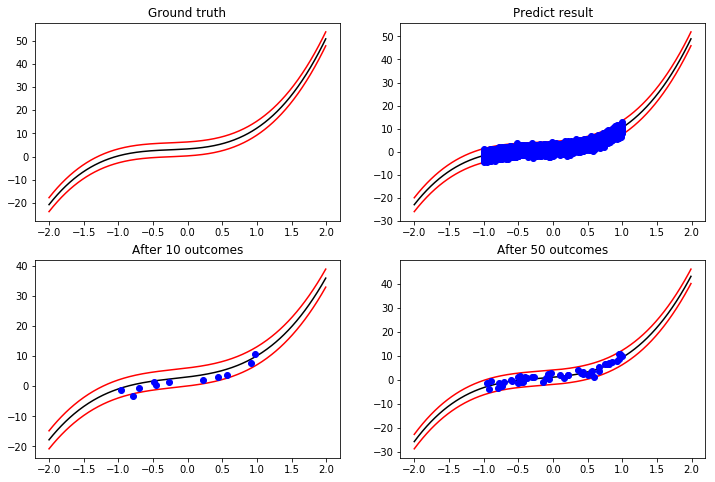

In [19]:
w=np.array([1, 2,3,4])
predictive_distribution(1, 4, 1, w ,plot=False)